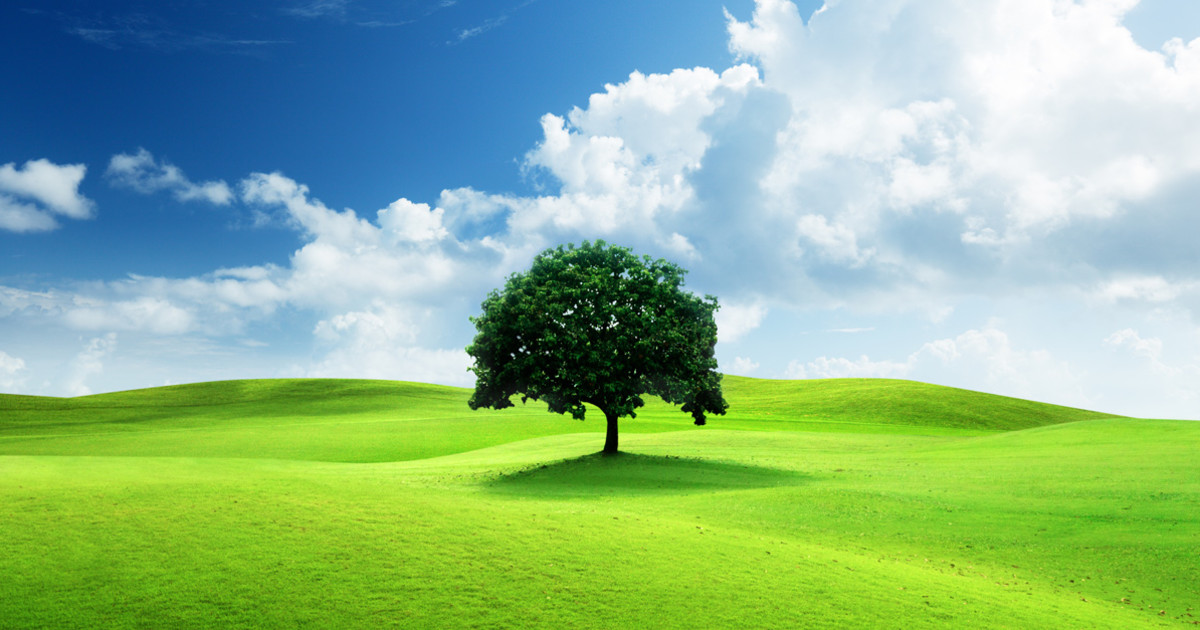

In [22]:
import cv2
from google.colab.patches import cv2_imshow

# Load the nature image
image = cv2.imread('/content/free-nature-images.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect objects (cats, in this case) in the image
cats = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected objects
for (x, y, w, h) in cats:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with detected objects
print("Original Image")
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


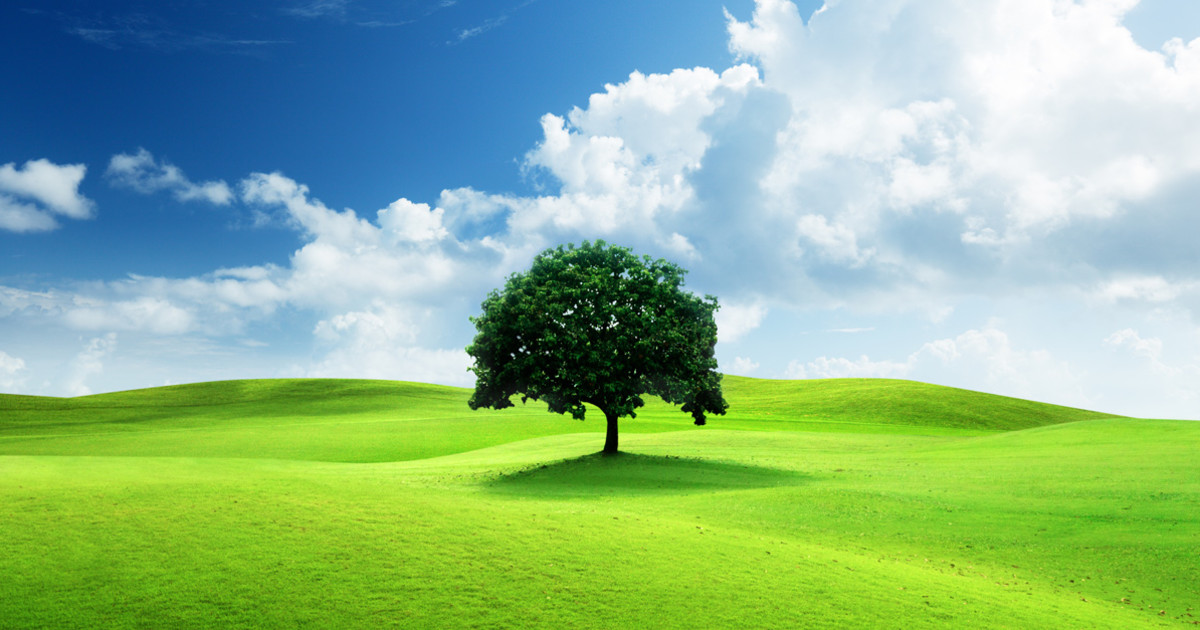

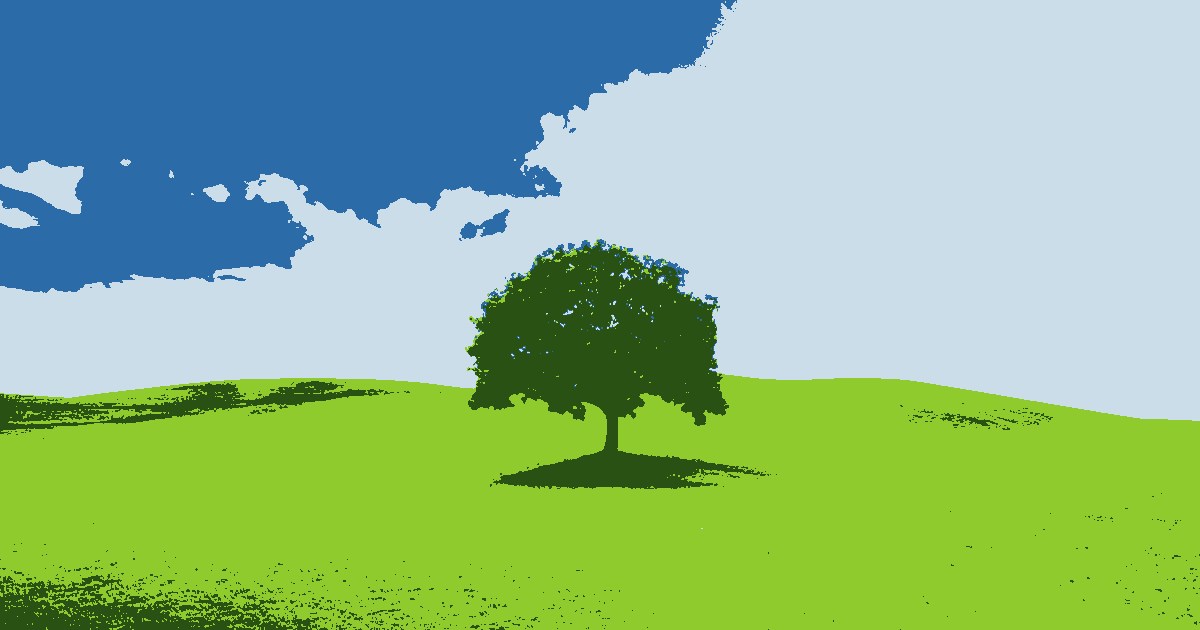

In [21]:
import numpy as np
# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert the pixels to float32
pixels = np.float32(pixels)

# Define criteria and apply kmeans() function
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 4  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape to original image shape
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original image and segmented image
print("Original Image")
cv2_imshow(image)
print("Segmented Image")
cv2_imshow(segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


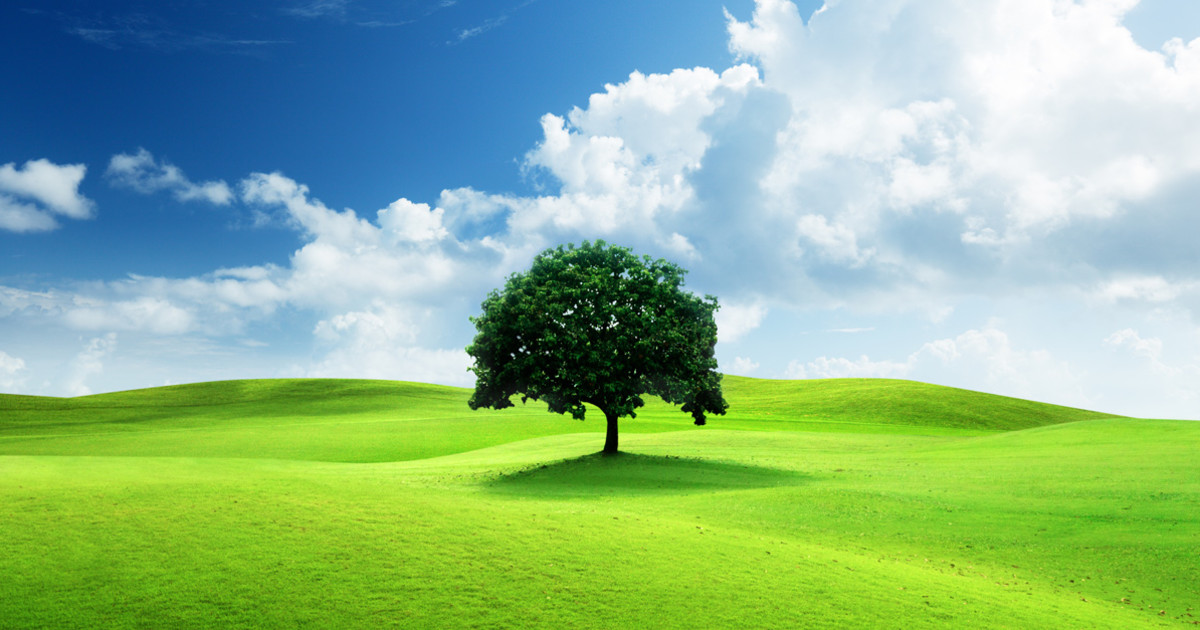

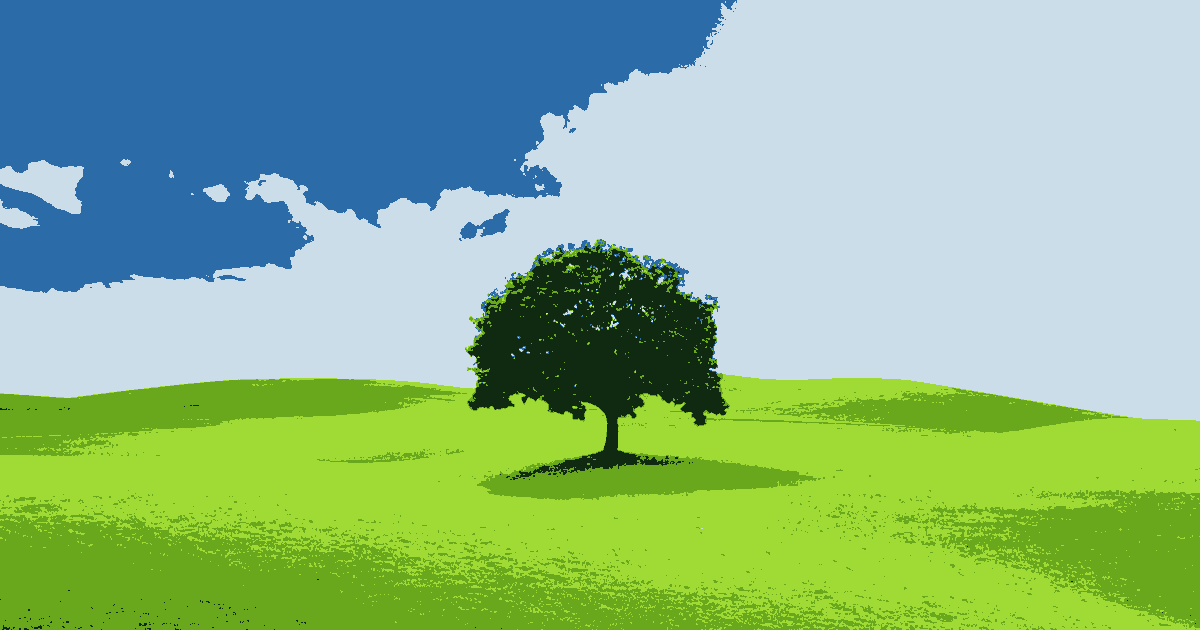

In [23]:
from sklearn.cluster import KMeans

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert the pixels to float32
pixels = np.float32(pixels)

# Define the number of clusters
num_clusters = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)

# Get the cluster centers and labels
centers = np.uint8(kmeans.cluster_centers_)
labels = kmeans.labels_

# Assign each pixel to its cluster center
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original image and segmented image
print("Original Image")
cv2_imshow(image)
print("Segmented Image")
cv2_imshow(segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
